<a href="https://colab.research.google.com/github/Rabia-Akhtr/Applied-Data-Science-1/blob/main/notebooks/hackathon_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Data Science Challenge 2025 — Group 1**
### *Module:* 7PAM2015 — Research Methods  
### *Instructor:*   Dr Pedro Carrilho  
### *Date:* 22 October 2025  

---

##  **Team Name:** **XAI Explorers**  
###  *Explaining intelligence through data and collaboration*  




# **👥 Team Members**
- **Riffat Munaf** — 22076284  
- **Eman Abdul Wahid** — 23013083  
- **Rabia Akhtar** — 23031641  
- **Hamza Tariq** — 23010525  
- **Anandhu Shaji** — 23006426  
- **Umar Sattar** — 23035824  
- **Arsalan Saleem** — 23034246  
- **Burhan Muhammad** — 22033349  
- **Naqash Razzaq** — 23033626  


###  **GitHub Repository**
🔗 [Data-Science-Challenge-Hackathon](https://github.com/DataScience-Challenge-Group1/Data-Science-Challenge-Hackathon)


# **1.  Project Overview**
This notebook documents the full workflow for our Data Science Challenge hackathon:
- Perform data exploration (EDA)
- Pre-process features
- Build and tune multiple models
- Evaluate performance with relevant metrics
- Apply Explainable AI (XAI) techniques
- Submit top-5 model results


# **2. Setup and Imports**

In [1]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing




In [2]:
# Mount your GoogleDrive (only need to do once)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3. Data Loading**

In [3]:
# Load the data
df_train = pd.read_csv("/content/drive/MyDrive/Hackathon/dataset_A_training.csv")
df_test  = pd.read_csv("/content/drive/MyDrive/Hackathon/dataset_A_testing.csv")

# Quick sanity checks
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)
print("Train columns:", list(df_train.columns)[:12], "...")

Train shape: (4756, 31)
Test shape: (4749, 30)
Train columns: ['respondent_id', 'flu_concern', 'flu_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_seasonal', 'chronic_med_condition'] ...


In [6]:
# Cell 2 — Domain knowledge & non-graphical analysis (head/info/describe, balance, missing)

TARGET = "seasonal_vaccine"
ID_COL = "respondent_id"

assert TARGET in df_train.columns
assert ID_COL in df_train.columns and ID_COL in df_test.columns

print("== Train.head(10) ==")
display(df_train.head(10))

print("\n== Train.info() ==")
df_train.info()

print("\n== Numeric describe (train) ==")
display(df_train.select_dtypes(include=["number"]).describe().T)

print("\n== Categorical describe (train) ==")
display(df_train.select_dtypes(exclude=["number"]).describe().T)

print("\n== Target distribution (train) ==")
tgt_counts = df_train[TARGET].value_counts(dropna=False).sort_index()
tgt_ratio  = (tgt_counts / len(df_train)).rename("ratio")
display(pd.concat([tgt_counts.rename("count"), tgt_ratio], axis=1))

print("\n== Missing values (train) — top 15 ==")
miss_train = df_train.isna().sum().sort_values(ascending=False)
display(miss_train[miss_train > 0].head(15))

print("\n== Missing values (test) — top 15 ==")
miss_test = df_test.isna().sum().sort_values(ascending=False)
display(miss_test[miss_test > 0].head(15))


== Train.head(10) ==


,respondent_id,flu_concern,flu_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,employment_sector,seasonal_vaccine
0,1,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,Non-MSA,0.0,0.0,entertainment,0
1,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,NaN,Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,real_estate,0
2,3,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,Male,"> $75,000",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,NaN,0
3,4,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,2.0,utilities,1
4,5,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Not Principle City",2.0,0.0,NaN,0
5,6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Female,"> $75,000",Married,Rent,Employed,Non-MSA,2.0,2.0,administrative,0
6,7,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",1.0,0.0,technology,1
7,8,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,NaN,NaN,NaN,NaN,"MSA, Not Principle City",NaN,NaN,NaN,0
8,9,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",3.0,0.0,NaN,1
9,10,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,NaN,0



== Train.info() ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                4756 non-null   int64  
 1   flu_concern                  4744 non-null   float64
 2   flu_knowledge                4733 non-null   float64
 3   behavioral_antiviral_meds    4742 non-null   float64
 4   behavioral_avoidance         4724 non-null   float64
 5   behavioral_face_mask         4753 non-null   float64
 6   behavioral_wash_hands        4748 non-null   float64
 7   behavioral_large_gatherings  4747 non-null   float64
 8   behavioral_outside_home      4747 non-null   float64
 9   behavioral_touch_face        4737 non-null   float64
 10  doctor_recc_seasonal         4435 non-null   float64
 11  chronic_med_condition        4568 non-null   float64
 12  child_under_6_months         4604 non-null   float64
 13

,count,mean,std,min,25%,50%,75%,max
respondent_id,4756.0,2378.500000,1373.083270,1.0,1189.75,2378.5,3567.25,4756.0
flu_concern,4744.0,1.643128,0.919810,0.0,1.00,2.0,2.00,3.0
flu_knowledge,4733.0,1.293049,0.618902,0.0,1.00,1.0,2.00,2.0
behavioral_antiviral_meds,4742.0,0.052299,0.222652,0.0,0.00,0.0,0.00,1.0
behavioral_avoidance,4724.0,0.734124,0.441846,0.0,0.00,1.0,1.00,1.0
behavioral_face_mask,4753.0,0.073848,0.261551,0.0,0.00,0.0,0.00,1.0
behavioral_wash_hands,4748.0,0.836563,0.369803,0.0,1.00,1.0,1.00,1.0
behavioral_large_gatherings,4747.0,0.365494,0.481619,0.0,0.00,0.0,1.00,1.0
behavioral_outside_home,4747.0,0.336634,0.472608,0.0,0.00,0.0,1.00,1.0
behavioral_touch_face,4737.0,0.688410,0.463192,0.0,0.00,1.0,1.00,1.0



== Categorical describe (train) ==


,count,unique,top,freq
age_group,4756,5,65+ Years,1169
education,4486,4,College Graduate,1879
race,4756,4,White,3766
sex,4756,2,Female,2783
income_poverty,3966,3,"<= $75,000, Above Poverty",2258
marital_status,4491,2,Married,2403
rent_or_own,4375,2,Own,3292
employment_status,4487,3,Employed,2467
census_msa,4756,3,"MSA, Not Principle City",2059
employment_sector,2442,21,media,511



== Target distribution (train) ==


,count,ratio
seasonal_vaccine,,
0,2205,0.463625
1,2551,0.536375



== Missing values (train) — top 15 ==


,0
employment_sector,2314
health_insurance,1925
income_poverty,790
rent_or_own,381
doctor_recc_seasonal,321
education,270
employment_status,269
marital_status,265
chronic_med_condition,188
child_under_6_months,152



== Missing values (test) — top 15 ==


,0
employment_sector,2405
health_insurance,1982
income_poverty,797
rent_or_own,379
doctor_recc_seasonal,345
employment_status,277
education,269
marital_status,269
chronic_med_condition,168
child_under_6_months,155


# **4. Exploratory Data Analysis (EDA)**

Numeric columns: 19
Categorical columns: 10


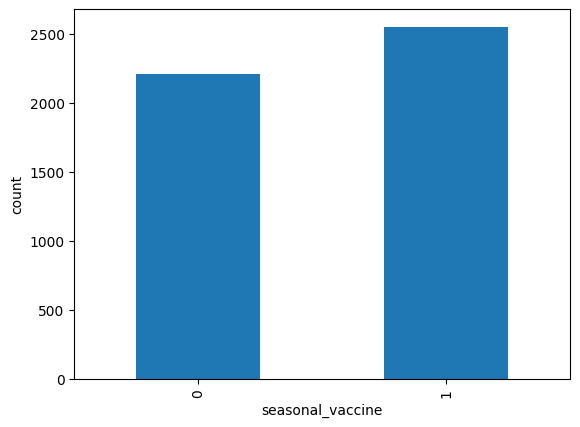

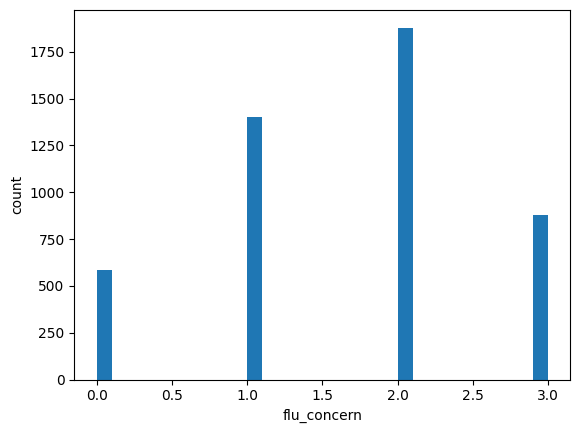

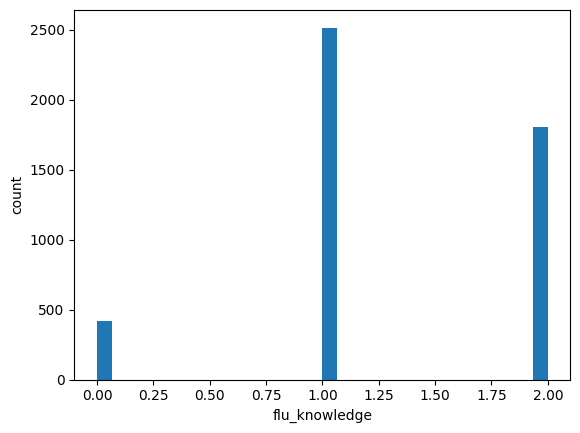

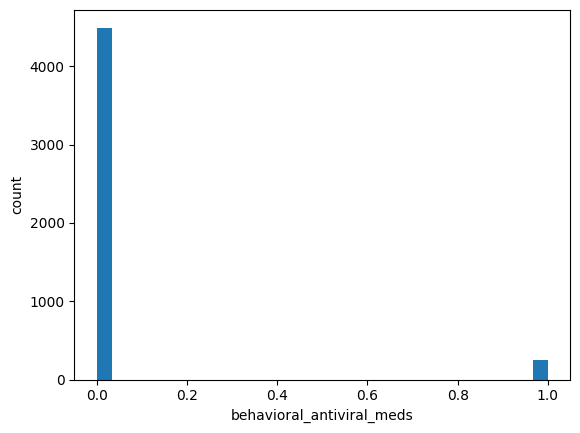

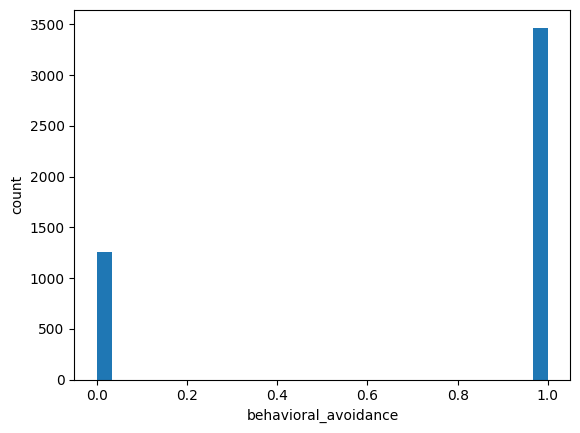

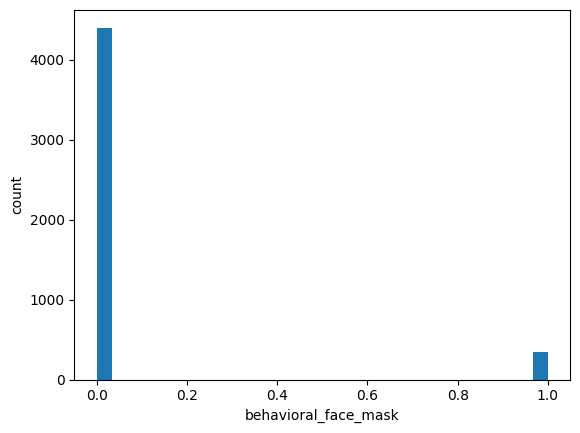

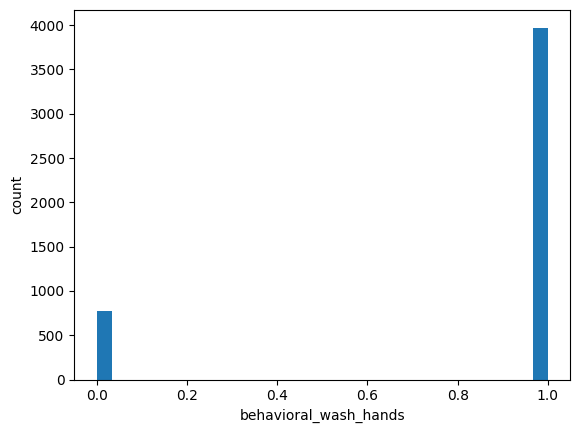

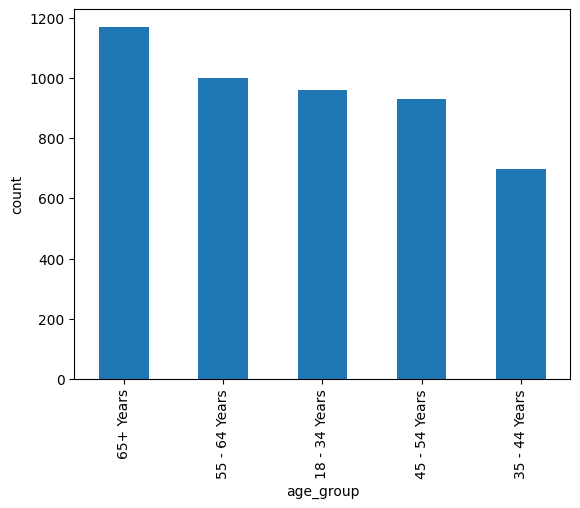

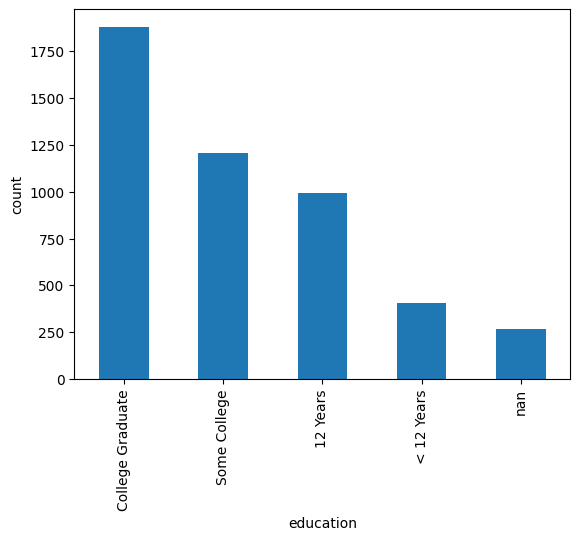

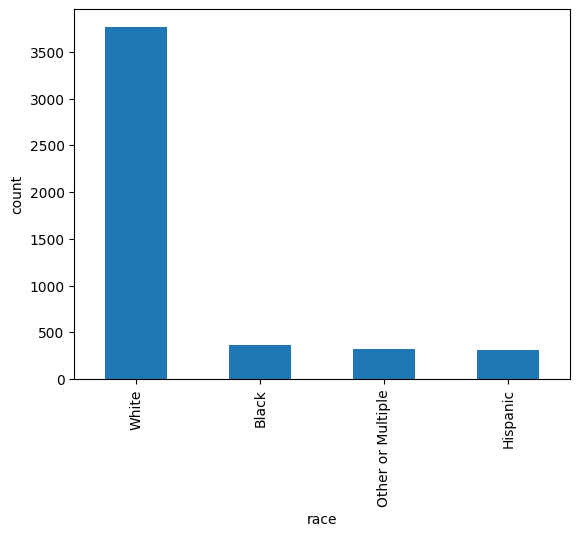

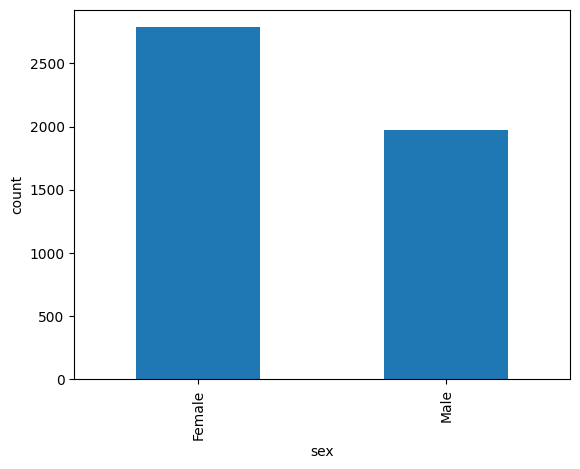

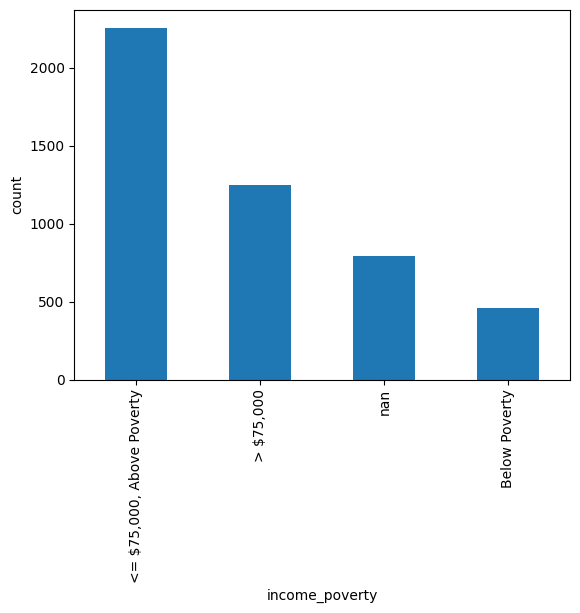

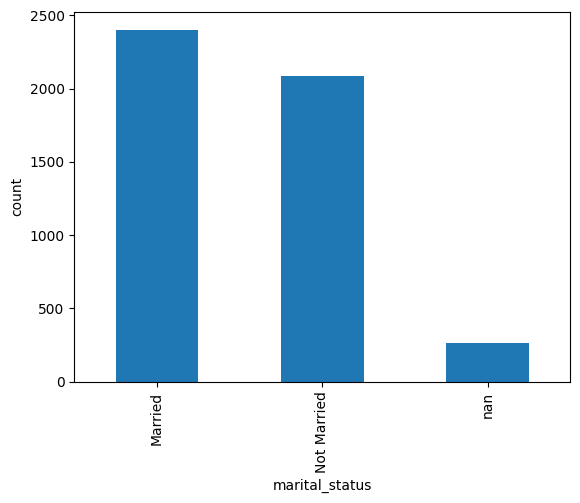


Target rate by age_group (row-normalized):


seasonal_vaccine,0,1
age_group,,
18 - 34 Years,0.651042,0.348958
35 - 44 Years,0.573888,0.426112
45 - 54 Years,0.502685,0.497315
55 - 64 Years,0.391391,0.608609
65+ Years,0.274594,0.725406



Target rate by education (row-normalized):


seasonal_vaccine,0,1
education,,
12 Years,0.488911,0.511089
< 12 Years,0.551724,0.448276
College Graduate,0.402342,0.597658
Some College,0.481390,0.518610



Target rate by race (row-normalized):


seasonal_vaccine,0,1
race,,
Black,0.618785,0.381215
Hispanic,0.630225,0.369775
Other or Multiple,0.514196,0.485804
White,0.430696,0.569304


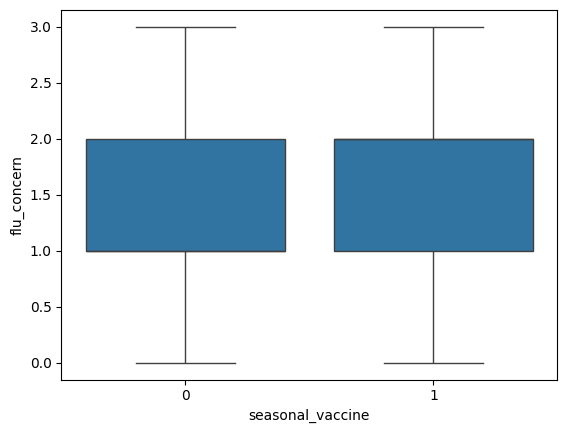

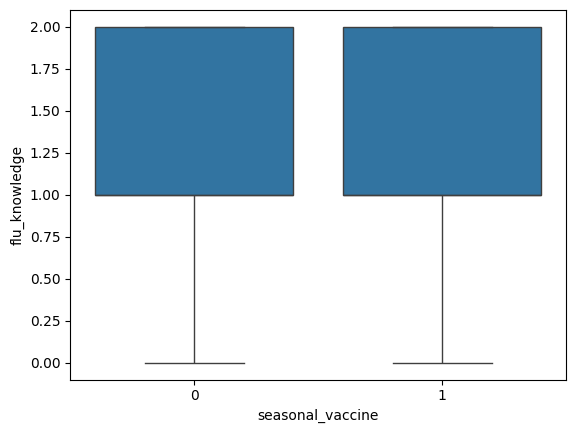

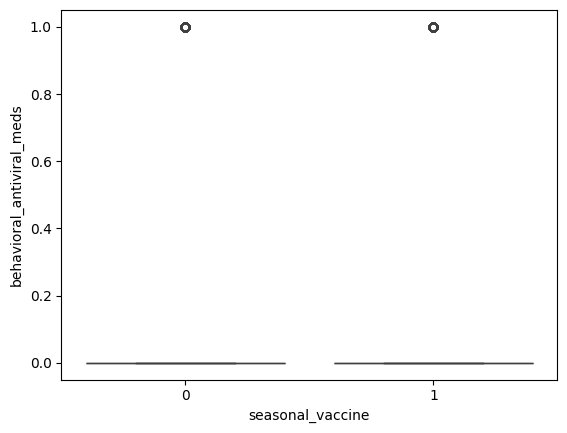

In [7]:
# Cell 3 — Basic EDA plots (simple)

# identify columns
num_cols = df_train.drop(columns=[TARGET, ID_COL], errors="ignore").select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df_train.columns if c not in num_cols + [TARGET, ID_COL]]

print("Numeric columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))

# 1) target distribution
df_train[TARGET].value_counts().sort_index().plot(kind="bar")
plt.xlabel(TARGET); plt.ylabel("count")
plt.show()

# 2) numeric histograms (up to 6)
for col in num_cols[:6]:
    df_train[col].dropna().plot(kind="hist", bins=30)
    plt.xlabel(col); plt.ylabel("count")
    plt.show()

# 3) categorical bars (up to 6; top 10 levels)
for col in cat_cols[:6]:
    df_train[col].value_counts(dropna=False).head(10).plot(kind="bar")
    plt.xlabel(col); plt.ylabel("count")
    plt.show()

# 4) simple target vs categorical (up to 3)
for col in cat_cols[:3]:
    ct = pd.crosstab(df_train[col], df_train[TARGET], normalize="index")
    print(f"\nTarget rate by {col} (row-normalized):")
    display(ct.head(10))

# 5) numeric vs target (up to 3)
for col in num_cols[:3]:
    sns.boxplot(x=df_train[TARGET], y=df_train[col])
    plt.xlabel(TARGET); plt.ylabel(col)
    plt.show()


Numeric shown: ['opinion_seas_vacc_effective', 'opinion_seas_risk', 'household_adults', 'household_children']
Categorical shown: ['sex', 'age_group', 'education', 'race']


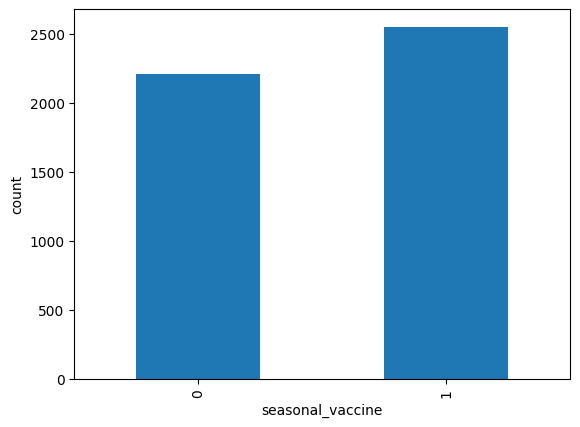

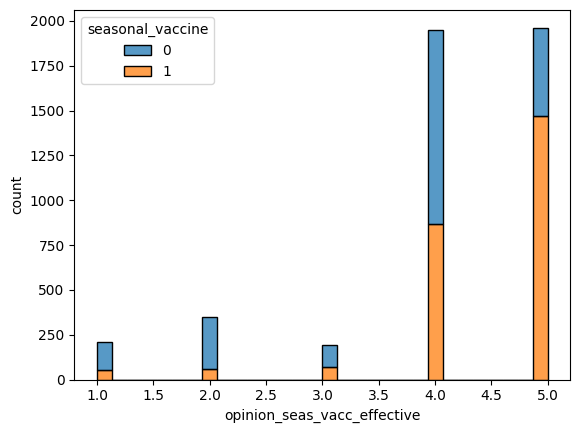

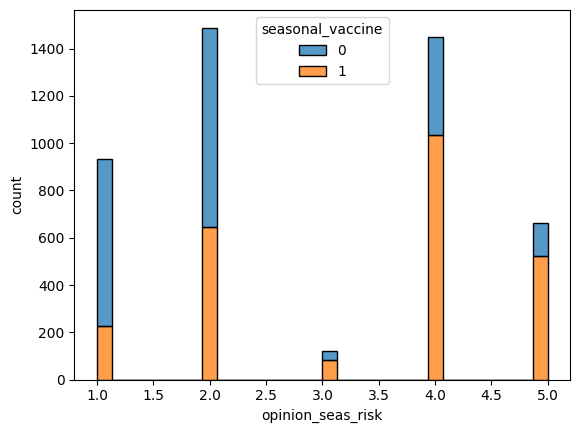

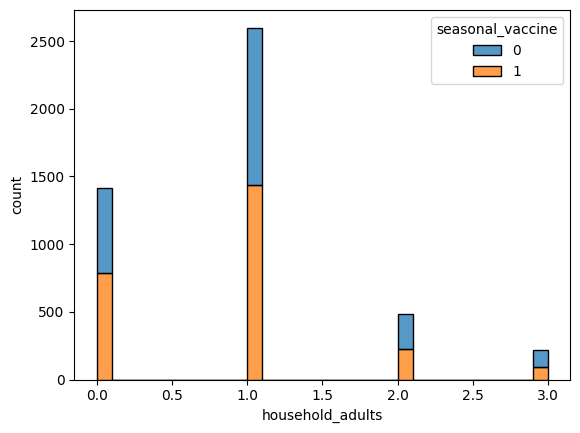

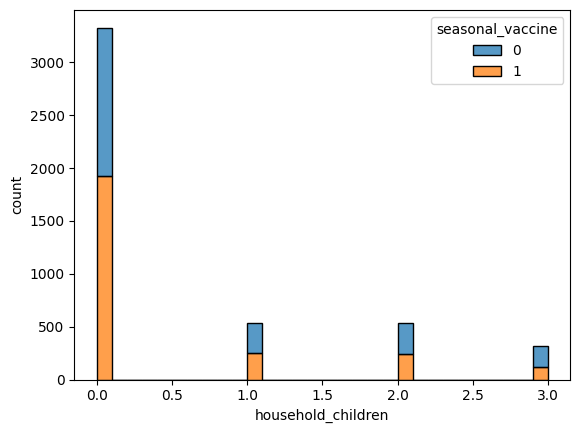

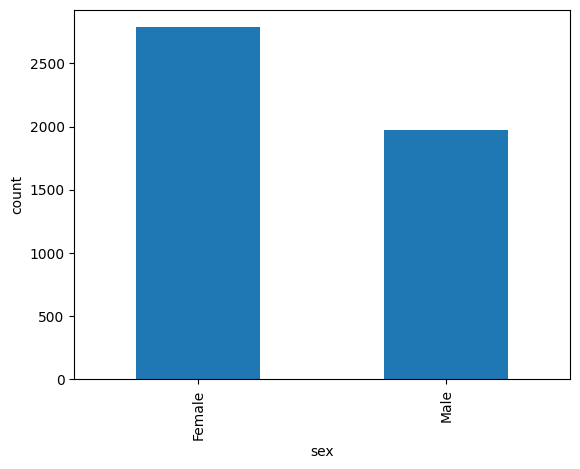

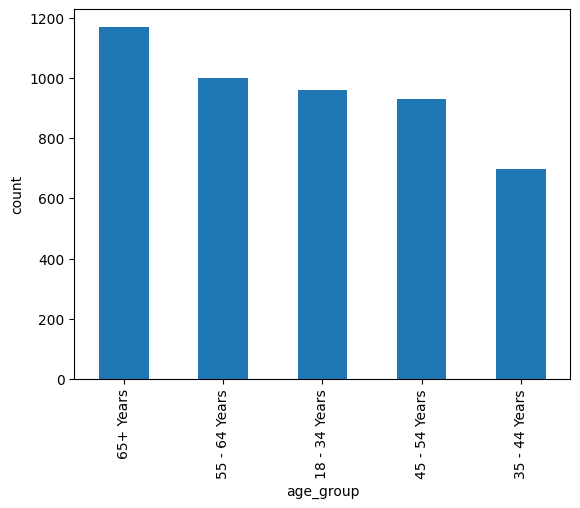

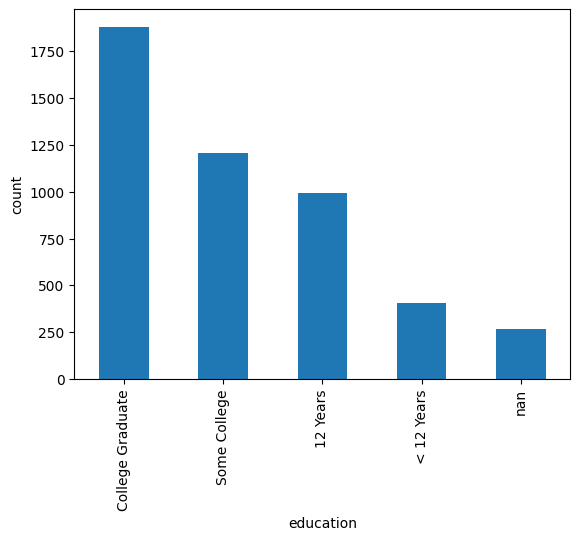

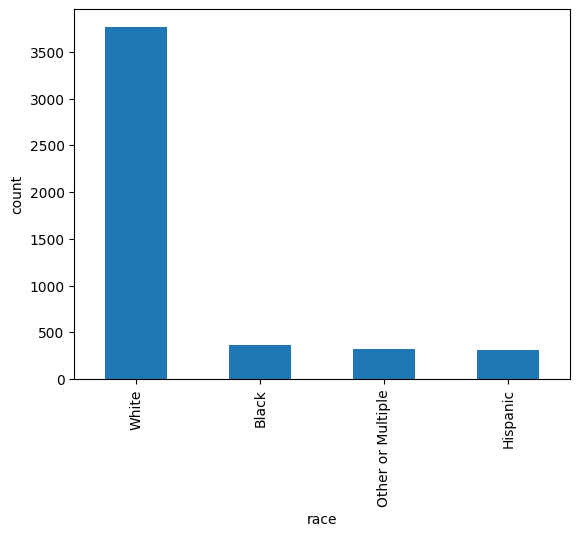


Target rate by sex:


seasonal_vaccine,0,1
sex,,
Female,0.428315,0.571685
Male,0.513431,0.486569



Target rate by age_group:


seasonal_vaccine,0,1
age_group,,
18 - 34 Years,0.651042,0.348958
35 - 44 Years,0.573888,0.426112
45 - 54 Years,0.502685,0.497315
55 - 64 Years,0.391391,0.608609
65+ Years,0.274594,0.725406



Target rate by education:


seasonal_vaccine,0,1
education,,
12 Years,0.488911,0.511089
< 12 Years,0.551724,0.448276
College Graduate,0.402342,0.597658
Some College,0.481390,0.518610


In [10]:
# Cell 3 (alt) — Simple EDA for Dataset A (no decorations)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

TARGET = "seasonal_vaccine"
ID_COL = "respondent_id"

num_cols = df_train.drop(columns=[TARGET, ID_COL], errors="ignore").select_dtypes("number").columns.tolist()
cat_cols = [c for c in df_train.columns if c not in num_cols + [TARGET, ID_COL]]

# Pick a few informative columns (adjust if missing)
num_to_plot = [c for c in ["opinion_seas_vacc_effective", "opinion_seas_risk",
                           "household_adults", "household_children"] if c in num_cols][:4]
cat_to_plot = [c for c in ["sex", "age_group", "education", "race"] if c in cat_cols][:4]

print("Numeric shown:", num_to_plot)
print("Categorical shown:", cat_to_plot)

# Target distribution
df_train[TARGET].value_counts().sort_index().plot(kind="bar")
plt.xlabel(TARGET); plt.ylabel("count"); plt.show()

# Numeric histograms
for col in num_to_plot:
    sns.histplot(data=df_train, x=col, hue=TARGET, bins=30, multiple="stack")
    plt.xlabel(col); plt.ylabel("count"); plt.show()

# Categorical bars (top levels)
for col in cat_to_plot:
    df_train[col].value_counts(dropna=False).head(10).plot(kind="bar")
    plt.xlabel(col); plt.ylabel("count"); plt.show()

# Target rate by categorical (row-normalized)
for col in cat_to_plot[:3]:
    ct = pd.crosstab(df_train[col], df_train[TARGET], normalize="index")
    print(f"\nTarget rate by {col}:")
    display(ct)


# **5. Data Pre-processing**

In [8]:
# Cell 4 — Preprocessing (leak-safe, same pattern as Tutorial 3)

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

TARGET = "seasonal_vaccine"
ID_COL = "respondent_id"

# features/target
X = df_train.drop(columns=[TARGET, ID_COL], errors="ignore").copy()
y = df_train[TARGET].copy()

# column splits
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

# train/valid split (stratified)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# preprocessors (fit on train only)
num_pipe = SimpleImputer(strategy="median")
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ]
)

# fit/transform
X_train_prep = preprocess.fit_transform(X_train)
X_valid_prep = preprocess.transform(X_valid)

print("X_train raw shape:", X_train.shape)
print("X_valid raw shape:", X_valid.shape)
print("X_train preprocessed shape:", X_train_prep.shape)
print("X_valid preprocessed shape:", X_valid_prep.shape)
print("Numerical cols:", len(num_cols), "| Categorical cols:", len(cat_cols))


X_train raw shape: (3804, 29)
X_valid raw shape: (952, 29)
X_train preprocessed shape: (3804, 68)
X_valid preprocessed shape: (952, 68)
Numerical cols: 19 | Categorical cols: 10


In [11]:
# Cell 4 — Pre-processing (One-Hot for all categoricals; no ordinal encoding)

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

TARGET = "seasonal_vaccine"
ID_COL = "respondent_id"

# features/target (drop ID + target)
X = df_train.drop(columns=[TARGET, ID_COL], errors="ignore").copy()
y = df_train[TARGET].copy()
X_test = df_test.drop(columns=[ID_COL], errors="ignore").copy()

# stratified split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# column groups
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

# imputers + encoders
num_pipe = SimpleImputer(strategy="median")
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="__MISSING__")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ]
)

# fit on train only; transform valid/test
X_train_prep = preprocess.fit_transform(X_train)
X_valid_prep = preprocess.transform(X_valid)
X_test_prep  = preprocess.transform(X_test)

print("X_train raw:", X_train.shape, "-> preprocessed:", X_train_prep.shape)
print("X_valid raw:", X_valid.shape, "-> preprocessed:", X_valid_prep.shape)
print("X_test  raw:", X_test.shape,  "-> preprocessed:", X_test_prep.shape)
print("num_cols:", len(num_cols), "| cat_cols:", len(cat_cols))


X_train raw: (3804, 29) -> preprocessed: (3804, 74)
X_valid raw: (952, 29) -> preprocessed: (952, 74)
X_test  raw: (4749, 29) -> preprocessed: (4749, 74)
num_cols: 19 | cat_cols: 10


# **6. Model Building**

In [12]:
# Cell 5 — Step 4: Baseline models (Pipeline → LogisticRegression & XGB), simple validation metrics

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
import numpy as np

# assumes: preprocess, X_train, X_valid, y_train, y_valid already defined in previous cells

def eval_model(name, pipe):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_valid)
    # use proba if available; else decision_function fallback
    if hasattr(pipe, "predict_proba"):
        y_proba = pipe.predict_proba(X_valid)[:, 1]
    else:
        # fallback produces scores that are not probs; still OK for ROC-AUC
        y_proba = pipe.decision_function(X_valid)
    auc = roc_auc_score(y_valid, y_proba)
    f1 = f1_score(y_valid, y_pred)
    acc = accuracy_score(y_valid, y_pred)
    cm = confusion_matrix(y_valid, y_pred)
    print(f"\n[{name}] ROC-AUC: {auc:.4f} | F1: {f1:.4f} | Acc: {acc:.4f}")
    print("Confusion matrix:\n", cm)
    return {"name": name, "auc": auc, "f1": f1, "acc": acc}

# 1) Logistic Regression (fast linear baseline)
pipe_lr = Pipeline(steps=[
    ("pre", preprocess),
    ("clf", LogisticRegression(
        solver="liblinear",
        class_weight="balanced",
        max_iter=1000,
        random_state=42,
        n_jobs=-1
    ))
])

# 2) XGBoost (strong tree baseline)
pipe_xgb = Pipeline(steps=[
    ("pre", preprocess),
    ("clf", XGBClassifier(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        eval_metric="logloss",
        tree_method="hist",
        random_state=42
    ))
])

results = []
results.append(eval_model("LogisticRegression", pipe_lr))
results.append(eval_model("XGBoost", pipe_xgb))

# simple leaderboard
results_sorted = sorted(results, key=lambda d: d["auc"], reverse=True)
print("\nValidation leaderboard (by ROC-AUC):")
for r in results_sorted:
    print(f"- {r['name']}: AUC={r['auc']:.4f} | F1={r['f1']:.4f} | Acc={r['acc']:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(



[LogisticRegression] ROC-AUC: 0.8474 | F1: 0.7924 | Acc: 0.7815
Confusion matrix:
 [[347  94]
 [114 397]]

[XGBoost] ROC-AUC: 0.8368 | F1: 0.7861 | Acc: 0.7731
Confusion matrix:
 [[339 102]
 [114 397]]

Validation leaderboard (by ROC-AUC):
- LogisticRegression: AUC=0.8474 | F1=0.7924 | Acc=0.7815
- XGBoost: AUC=0.8368 | F1=0.7861 | Acc=0.7731


# **7. Hyper-parameter Tuning**

In [13]:
# Cell 6 — Stratified 5-fold CV, quick tuning, and threshold sweep on validation

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipelines sharing the same preprocess from Cell 4
lr_grid = [
    {"clf__C": c, "clf__class_weight": "balanced"} for c in [0.25, 0.5, 1.0, 2.0, 4.0]
]
xgb_grid = []
for n in [300, 600, 900]:
    for md in [3, 5, 7]:
        for lr in [0.05, 0.1]:
            xgb_grid.append({"clf__n_estimators": n, "clf__max_depth": md, "clf__learning_rate": lr})

def cv_search(base_pipe, param_list, name):
    best_auc, best_params = -1.0, None
    for params in param_list:
        pipe = Pipeline([("pre", preprocess), ("clf", base_pipe)])
        pipe.set_params(**params)
        auc = cross_val_score(pipe, X, y, cv=cv, scoring="roc_auc").mean()
        if auc > best_auc:
            best_auc, best_params = auc, params
    print(f"[CV] {name} best AUC={best_auc:.4f} params={best_params}")
    return best_auc, best_params

# 1) Logistic Regression CV search
lr_base = LogisticRegression(solver="liblinear", max_iter=1000, random_state=42)
lr_best_auc, lr_best_params = cv_search(lr_base, lr_grid, "LogisticRegression")

# 2) XGBoost CV search
xgb_base = XGBClassifier(
    subsample=0.9, colsample_bytree=0.9, reg_lambda=1.0,
    eval_metric="logloss", tree_method="hist", random_state=42
)
xgb_best_auc, xgb_best_params = cv_search(xgb_base, xgb_grid, "XGBoost")

# Pick best family
if lr_best_auc >= xgb_best_auc:
    best_name, best_base, best_params = "LogisticRegression", lr_base, lr_best_params
else:
    best_name, best_base, best_params = "XGBoost", xgb_base, xgb_best_params

# Fit best on train, evaluate on validation with threshold sweep
best_pipe = Pipeline([("pre", preprocess), ("clf", best_base)])
best_pipe.set_params(**best_params)
best_pipe.fit(X_train, y_train)

if hasattr(best_pipe, "predict_proba"):
    val_scores = best_pipe.predict_proba(X_valid)[:, 1]
else:
    val_scores = best_pipe.decision_function(X_valid)

# Threshold sweep to maximize F1
ths = np.linspace(0.2, 0.8, 25)
f1s = []
for t in ths:
    y_pred = (val_scores >= t).astype(int)
    f1s.append(f1_score(y_valid, y_pred))
best_t = float(ths[int(np.argmax(f1s))])

# Report at 0.5 and at best threshold
def report_at(th):
    y_pred = (val_scores >= th).astype(int)
    auc = roc_auc_score(y_valid, val_scores)
    f1 = f1_score(y_valid, y_pred)
    acc = accuracy_score(y_valid, y_pred)
    return auc, f1, acc

auc_05, f1_05, acc_05 = report_at(0.5)
auc_bt, f1_bt, acc_bt = report_at(best_t)

print(f"\nBest model: {best_name} with {best_params}")
print(f"Validation (thr=0.50): AUC={auc_05:.4f} | F1={f1_05:.4f} | Acc={acc_05:.4f}")
print(f"Validation (thr={best_t:.3f}): AUC={auc_bt:.4f} | F1={f1_bt:.4f} | Acc={acc_bt:.4f}")


[CV] LogisticRegression best AUC=0.8462 params={'clf__C': 0.5, 'clf__class_weight': 'balanced'}
[CV] XGBoost best AUC=0.8518 params={'clf__n_estimators': 300, 'clf__max_depth': 3, 'clf__learning_rate': 0.05}

Best model: XGBoost with {'clf__n_estimators': 300, 'clf__max_depth': 3, 'clf__learning_rate': 0.05}
Validation (thr=0.50): AUC=0.8554 | F1=0.8004 | Acc=0.7857
Validation (thr=0.425): AUC=0.8554 | F1=0.8060 | Acc=0.7815


# **8. Performance Analysis**

AUC: 0.8554 | F1@0.50: 0.8004 | Acc@0.50: 0.7857
Confusion matrix @0.50:
 [[339 102]
 [102 409]]
Best threshold ~ 0.420 -> F1=0.8086 | Acc=0.7836


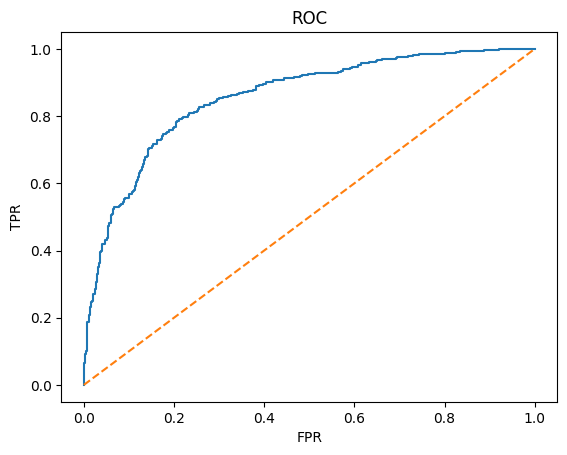

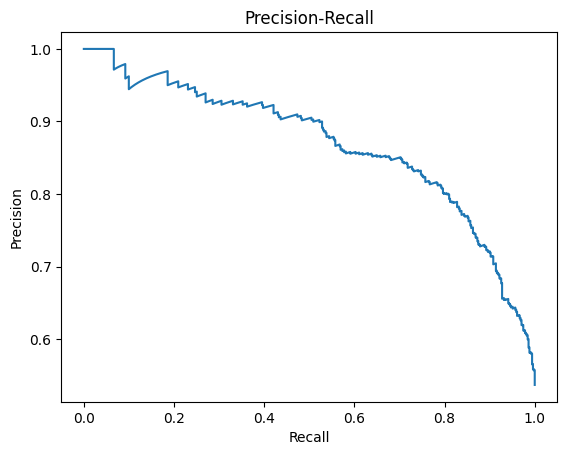

In [14]:
# Cell 8 — Step 5: Performance analysis on validation (simple, teacher style)

from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_auc_score, f1_score, accuracy_score, confusion_matrix,
    roc_curve, precision_recall_curve
)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# assumes: X_train, X_valid, y_train, y_valid, preprocess from Cell 4

best_params = {"n_estimators": 300, "max_depth": 3, "learning_rate": 0.05}

val_pipe = Pipeline(steps=[
    ("pre", preprocess),
    ("clf", XGBClassifier(
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        eval_metric="logloss",
        tree_method="hist",
        random_state=42,
        **best_params
    ))
])

val_pipe.fit(X_train, y_train)

# scores and predictions
y_score = val_pipe.predict_proba(X_valid)[:, 1]
y_pred_05 = (y_score >= 0.5).astype(int)

# metrics @0.5
auc = roc_auc_score(y_valid, y_score)
f1  = f1_score(y_valid, y_pred_05)
acc = accuracy_score(y_valid, y_pred_05)
cm  = confusion_matrix(y_valid, y_pred_05)

print(f"AUC: {auc:.4f} | F1@0.50: {f1:.4f} | Acc@0.50: {acc:.4f}")
print("Confusion matrix @0.50:\n", cm)

# choose a better threshold by maximizing F1 on validation
ths = np.linspace(0.2, 0.8, 61)
f1s = [f1_score(y_valid, (y_score >= t).astype(int)) for t in ths]
best_t = float(ths[int(np.argmax(f1s))])
y_pred_bt = (y_score >= best_t).astype(int)
f1_bt = f1_score(y_valid, y_pred_bt)
acc_bt = accuracy_score(y_valid, y_pred_bt)
print(f"Best threshold ~ {best_t:.3f} -> F1={f1_bt:.4f} | Acc={acc_bt:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_valid, y_score)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC")
plt.show()

# PR curve
prec, rec, _ = precision_recall_curve(y_valid, y_score)
plt.plot(rec, prec)
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision-Recall")
plt.show()


# **9. Explainable AI (XAI)**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 1.8 MB/s eta 0:00:00
Top 15 features by Permutation Importance:


,feature,importance,std
15,num__opinion_seas_risk,0.072383,0.005571
9,num__doctor_recc_seasonal,0.044547,0.007542
14,num__opinion_seas_vacc_effective,0.036791,0.003992
23,cat__age_group_65+ Years,0.024831,0.003902
16,num__opinion_seas_sick_from_vacc,0.008852,0.001503
19,cat__age_group_18 - 34 Years,0.004554,0.002768
12,num__health_worker,0.004398,0.001076
1,num__flu_knowledge,0.004328,0.001191
26,cat__education_College Graduate,0.002505,0.001230
22,cat__age_group_55 - 64 Years,0.002421,0.000770


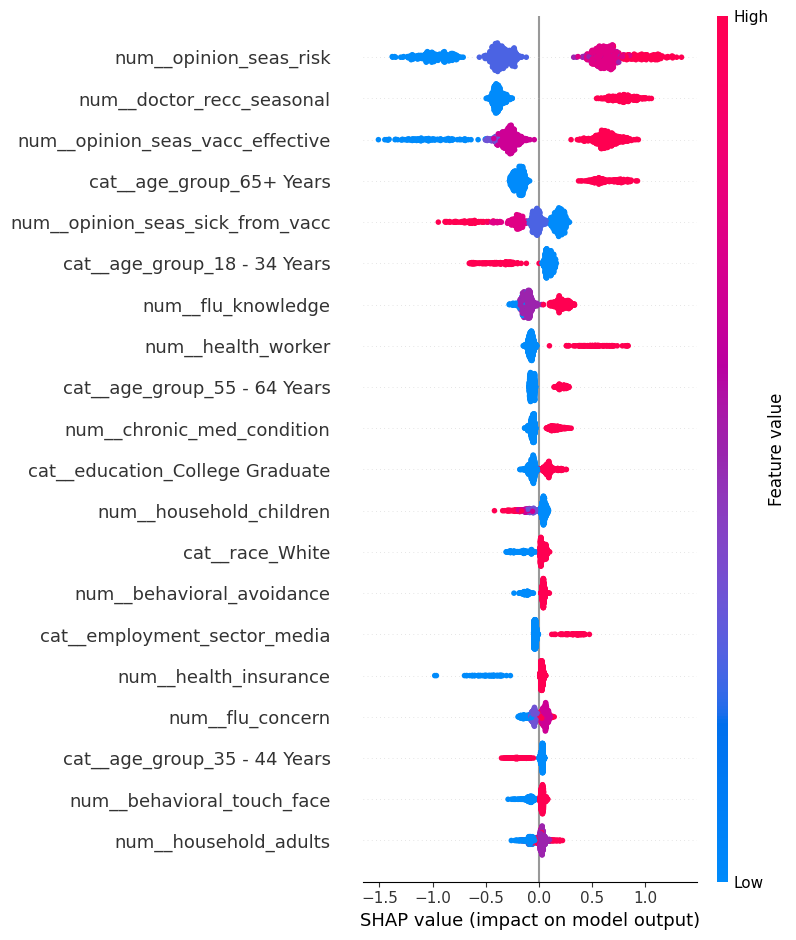

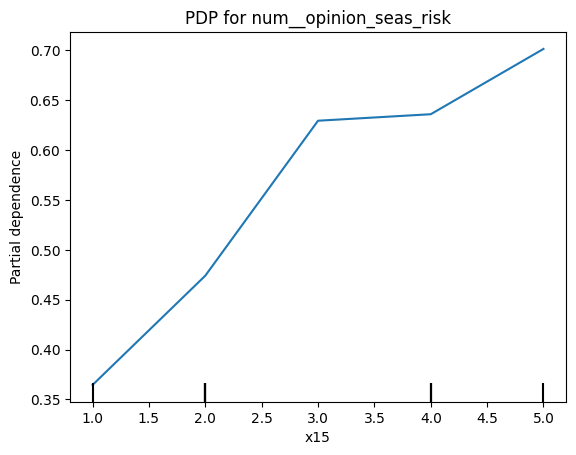

In [15]:
#  Explainable AI (Permutation Importance + SHAP; simple)

# assumes: val_pipe is fitted; preprocess from Cell 4; X_train_prep, X_valid_prep from Cell 4
# We will: (1) Permutation Importance on validation, (2) SHAP summary, (3) optional PDP for top feature

# 0) get fitted model and feature names after One-Hot
model = val_pipe.named_steps["clf"]
pre = val_pipe.named_steps["pre"]
feature_names = pre.get_feature_names_out()

# 1) Permutation Importance (validation set)
!pip -q install eli5
import eli5
from eli5.sklearn import PermutationImportance
import pandas as pd

perm = PermutationImportance(model, random_state=42, scoring="roc_auc")
perm.fit(X_valid_prep, y_valid)

pi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": perm.feature_importances_,
    "std": perm.feature_importances_std_
}).sort_values("importance", ascending=False)

print("Top 15 features by Permutation Importance:")
display(pi_df.head(15))

# 2) SHAP summary (tree explainer on preprocessed validation)
!pip -q install shap
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_valid_prep)

# summary plot
shap.summary_plot(shap_values, X_valid_prep, feature_names=feature_names, show=True)

# 3) Optional: Partial Dependence for top PI feature (index-based on preprocessed matrix)
from sklearn.inspection import PartialDependenceDisplay

top_feat = pi_df.iloc[0]["feature"]
top_idx = list(feature_names).index(top_feat)

PartialDependenceDisplay.from_estimator(
    model,               # estimator is the tree model
    X_valid_prep,        # preprocessed features
    [top_idx],           # feature index in the preprocessed matrix
    kind="average"
)
plt.title(f"PDP for {top_feat}")
plt.show()
